In [2]:
import joblib
import pickle
import minisom
import laytr

First, we need to create a som

In [2]:
kfeats = joblib.load("../repo_utils/kfeat.jl")
som = minisom.MiniSom(15, 15, 64, sigma=1.5, learning_rate=1,
                      topology='hexagonal',
                      neighborhood_function='gaussian', 
                      activation_distance='euclidean',
                      random_seed=2023
                     )
som.train_batch(kfeats, 10_000, verbose=True)
joblib.dump(som, 'chr22_example.som')

 [ 10000 / 10000 ] 100% - 0:00:00 left 
 quantization error: 0.10895308115856686


Next, we map our data to the SOM. We can do this via the command line with `laytr map` or programmatically

In [4]:
m_map = laytr.map_to_som(kfeats, som)

One way to QC the SOM is to see how many of our rows map to each neuron.

In [9]:
with open("../soms/adotto_TRv1.1_3mers.som", 'rb') as infile:
    som = pickle.load(infile)

In [10]:
joblib.dump(som, "../adotto_TRv1.1_3mers.som")

['../adotto_TRv1.1_3mers.som']

In [11]:
kfeats = joblib.load("../soms/adotto_TRr_kfeats_3mers.jl")
som = joblib.load("../adotto_TRv1.1_3mers.som")
m_map = laytr.map_to_som(kfeats, som)

In [14]:
from collections import Counter
cnts = Counter([tuple(_) for _ in m_map])

In [16]:
m_map[:, 1].shape

(1784804,)

(25, 25, 64)

In [24]:
import numpy as np
umatrix = np.zeros(som._weights.shape[:2])
for idx, val in cnts.items():
    umatrix[idx] = val

In [30]:
help(laytr.make_hex_plot)

Help on function make_hex_plot in module laytr.somplot:

make_hex_plot(som, hue=None, hue_label='Distance', color_map=<matplotlib.colors.LinearSegmentedColormap object at 0x11ab1d370>, hue_count_ticks=False, color_norm=None)
    Creates the hex plot for a som. Hue is a matrix of the same shape as the SOM.
    By default, hue will be a som.distance_map()



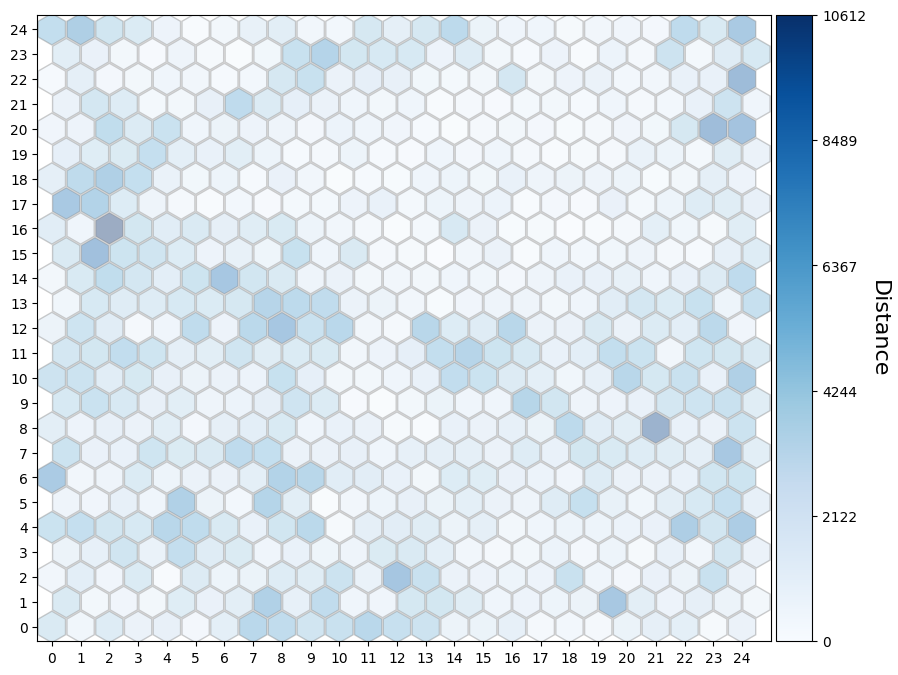

In [38]:
plot = laytr.make_hex_plot(som, hue=umatrix, hue_count_ticks=True)

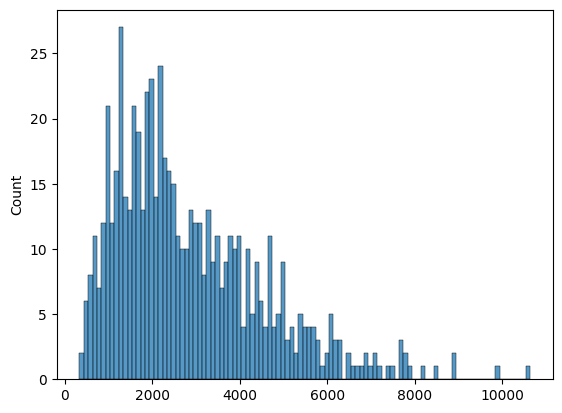

In [39]:
import seaborn as sb
import matplotlib.pyplot as plt
p = sb.histplot(np.ravel(umatrix), binwidth=100)
plt.show()